In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from socket import *
serv = socket(AF_INET,SOCK_STREAM)



In [ ]:
df = pd.read_csv('CustomerDataClean.csv',sep=",", encoding='Latin-1')
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


###### Implementing DBSCAN

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
#X = Normalizer().fit_transform(df)

#usind scaler fuction to scale dataset
scalar=StandardScaler()

scaled_df = scalar.fit_transform(df)
scaled_df


scalar=StandardScaler()
X = scalar.fit_transform(df)

col_list = list(df.columns)

df = pd.DataFrame(data=X, columns=col_list)

df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-4.390474e-16,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


In [ ]:
min_samples = df.shape[1]*2
dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
clusters = dbscan.fit_predict(df)
print("clusters created: "+ str(list(set(clusters))))

clusters created: [0, 1, 2, -1]


In [ ]:
# identified no clusters from the value above

###### implementing DBSCAN with Elbow Method

In [ ]:
# finding the best value of eps to use

In [ ]:
k = min_samples if min_samples > 2 else 2
nbrs = NearestNeighbors(n_neighbors=k).fit(df)
distance, indices = nbrs.kneighbors(df)

In [ ]:
print("min samples: "+ str(min_samples))
print("shape of distance matrix: "+ str(distance.shape)+"\n")
for enum, row in enumerate(distance[:5]):
    print("observation "+ str(enum)+": "+ str([round(x,2) for x in row]))

min samples: 34
shape of distance matrix: (8950, 34)

observation 0: [0.0, 0.46, 0.49, 0.49, 0.51, 0.58, 0.62, 0.62, 0.65, 0.69, 0.73, 0.74, 0.76, 0.78, 0.79, 0.79, 0.79, 0.8, 0.81, 0.81, 0.81, 0.83, 0.84, 0.84, 0.85, 0.86, 0.86, 0.86, 0.88, 0.88, 0.88, 0.89, 0.89, 0.89]
observation 1: [0.0, 1.26, 1.34, 1.35, 1.37, 1.42, 1.44, 1.44, 1.46, 1.46, 1.48, 1.51, 1.52, 1.54, 1.56, 1.61, 1.64, 1.66, 1.69, 1.7, 1.73, 1.74, 1.74, 1.75, 1.75, 1.76, 1.76, 1.77, 1.78, 1.78, 1.78, 1.79, 1.84, 1.84]
observation 2: [0.0, 0.4, 0.67, 0.71, 0.73, 0.76, 0.84, 0.92, 0.92, 0.95, 0.96, 0.96, 0.98, 0.98, 0.98, 1.06, 1.08, 1.09, 1.1, 1.11, 1.14, 1.14, 1.14, 1.17, 1.18, 1.19, 1.21, 1.21, 1.25, 1.25, 1.26, 1.26, 1.27, 1.28]
observation 3: [0.0, 1.04, 1.32, 1.33, 1.42, 1.47, 1.47, 1.49, 1.49, 1.51, 1.52, 1.52, 1.54, 1.55, 1.55, 1.56, 1.57, 1.57, 1.58, 1.59, 1.59, 1.62, 1.62, 1.62, 1.63, 1.63, 1.64, 1.64, 1.64, 1.64, 1.65, 1.66, 1.66, 1.66]
observation 4: [0.0, 0.1, 0.13, 0.16, 0.18, 0.19, 0.2, 0.21, 0.22, 0.22, 0

In [ ]:
# the last cell represents the distance of the Kth farthest point
df['knn_farthest_dist'] = distance[:,-1]
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,knn_farthest_dist
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,0.890492
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,1.843628
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,1.276966
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068,1.664485
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,0.350326


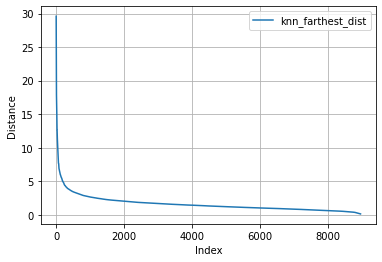

In [ ]:
df.sort_values('knn_farthest_dist', ascending=False).reset_index()[['knn_farthest_dist']].plot()
plt.xlabel('Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
            x=range(1,15),
            y= inertia,
            S=0.1, curve="convex",direction="decreasing",online=True)

K_cost_c3 = cost_knee_c3.elbow
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

In [ ]:
# km= DBSCAN(eps=0.28, min_samples=min_samples)
# df['cluster'] = km.fit_predict(df[col_list])

# df.cluster.value_counts()

In [ ]:
km= DBSCAN(eps=0.2, min_samples=min_samples)
X=df[col_list]
df['cluster'] = km.fit_predict(X)
labels = df['cluster'].labels_
df.cluster.value_counts()

-1    8869
 0      81
Name: cluster, dtype: int64

In [ ]:
# km= DBSCAN(eps=0.15, min_samples=min_samples)
# df['cluster'] = km.fit_predict(df[col_list])

# df.cluster.value_counts()

PRINCIPAL COMPONENT ANALYSIS

In [ ]:
pca = PCA(n_components= 2)
principal_comp= pca.fit_transform(X)
principal_comp

array([[-1.68222048, -1.07644991],
       [-1.13829636,  2.50647973],
       [ 0.96967181, -0.383514  ],
       ...,
       [-0.92619977, -1.81078812],
       [-2.33654759, -0.6579688 ],
       [-0.5564251 , -0.40046676]])

In [ ]:
pca_df = pd.DataFrame(data=principal_comp, columns=['PCA1','PCA2'])

In [ ]:
pca_df

# df_cluster_pca = pd.concat([pca_df, pd.DataFrame({'cluster':y_cluster_dbs})], axis=1)
df_cluster_pca = pd.concat([pca_df, df['cluster']], axis=1)

df_cluster_pca

,PCA1,PCA2,cluster
0,-1.682220,-1.076450,-1
1,-1.138296,2.506480,-1
2,0.969672,-0.383514,-1
3,-0.873628,0.043167,-1
4,-1.599434,-0.688581,-1
...,...,...,...
8945,-0.359625,-2.016148,-1
8946,-0.564367,-1.639125,-1
8947,-0.926200,-1.810788,-1
8948,-2.336548,-0.657969,-1


In [ ]:
df_cluster_pca.cluster.value_counts()

-1    8869
 0      81
Name: cluster, dtype: int64

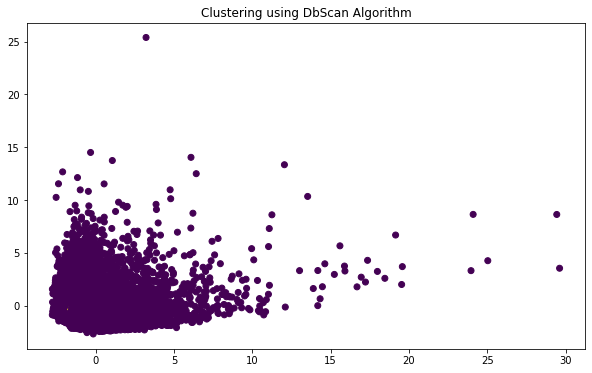

In [ ]:
#Plot
plt.figure(figsize=(10,6))
plt.scatter(df_cluster_pca['PCA1'],df_cluster_pca['PCA2'],c=df_cluster_pca['cluster'])
plt.title("Clustering using DbScan Algorithm")
plt.show()

#plt.figure(figsize=(8,8))
#ax= sns.scatterplot(x='PCA1',y='PCA2',hue="cluster",c=df_cluster_pca,palette=['blue','purple'])
#plt.title("Clustering using DbScan Algorithm")
#plt.show()

# Silhoutte Test

In [ ]:
dbscan = km
model = dbscan.fit(X)

labels = model.labels_
set(labels)

from sklearn import metrics


# identifing the core points
sample_cores = np.zeros_like(labels, dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True

#  calculating the number of clusters
n_clusters = len(set(labels))- (1 if -1 in labels else 0)
n_clusters


print(metrics.silhouette_score(X,labels))

-0.23871877362917585
